

# Project: Football (i.e. US Soccer) Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Loading data from sqlite
First check the table names in the database

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
con = sqlite3.connect("./database.sqlite")
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

**Creating** a class to contain the dataframes loaded from the sqlite tables

In [3]:
# Creating a collection of the dataframes 
class DataFrameCollection:
    pass
dfs = DataFrameCollection()
[ dfs.__setattr__( tablename[0], pd.read_sql_query("SELECT * FROM " + tablename[0] + ";", con) ) for tablename in tables ]
dfs.__delattr__('sqlite_sequence')

#### Checking how dataframes look like

In [4]:
print(dfs.Country.head(3))
print(dfs.League.head(3))
print(dfs.Match.head(3))
print(dfs.Player.head(3))
print(dfs.Player_Attributes.head(3))
print(dfs.Team.head(3))
print(dfs.Team_Attributes.head(3))

     id     name
0     1  Belgium
1  1729  England
2  4769   France
     id  country_id                    name
0     1           1  Belgium Jupiler League
1  1729        1729  England Premier League
2  4769        4769          France Ligue 1
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  SJA  \
0        492473              9987              9993               1  ...  4.0   
1        492474             10000              9994               0  ...  3.8   
2        492475              9984              8635               0  ...  2.5   

    VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  
1  2.00  3.25  3.25  1.85  3.2

#### Match table
This table seems interesting to me, as it also contains too many columns. 

Viewing first 30 columns:

In [5]:
print(dfs.Match.columns[:30])

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8'],
      dtype='object')


#### Listing tables' columns names

In [6]:
print(dfs.Country.columns)
print(dfs.League.columns)
print(dfs.Match.columns)
print(dfs.Player.columns)
print(dfs.Player_Attributes.columns)
print(dfs.Team.columns)
print(dfs.Team_Attributes.columns)

Index(['id', 'name'], dtype='object')
Index(['id', 'country_id', 'name'], dtype='object')
Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)
Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions

#### how is the data looking like in Match table
Here I am getting a sense about the data in this table that I am interested about

In [7]:
dfs.Match.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


> In the next step, the data shall be cleaned to suit my goal.

### Data Cleaning (Form a table that represents team results)

At this stage the aim is to collect team attributes and end of season results (points) to find a candidate correlation. Before getting the `points`, I am cleaning the data aiming at getting the number of wins, losses and draws throughout each season for each team.

 #### add year column to match and team_attributes tables
 
 Here a simple operation to trime the date and extract the year into a new column

In [8]:

print("Number of nulls in date column in Team Attributes table is: ", dfs.Team_Attributes.date.isnull().sum())
print("Number of nulls in date column in Matches Table is: ", dfs.Match.date.isnull().sum())

## Checking if date in both tables start by year
print("If value is 0  then first four characters of date are numeric - value = ",\
      dfs.Team_Attributes.date.apply(lambda d: not d[:4].isnumeric()).sum())
print("If value is 0  then first four characters of date are numeric - value = ",\
      dfs.Match.date.apply(lambda d: not d[:4].isnumeric()).sum())

## add year column to both tables and make it int
dfs.Match["Year"] = dfs.Match.date.apply(lambda d:  int(d[:4]))
dfs.Team_Attributes["Year"] = dfs.Team_Attributes.date.apply(lambda d:  int(d[:4]))

Number of nulls in date column in Team Attributes table is:  0
Number of nulls in date column in Matches Table is:  0
If value is 0  then first four characters of date are numeric - value =  0
If value is 0  then first four characters of date are numeric - value =  0


#### Add season column to Team_attributes

A season takes place on a yearly basis , it will require some hectic processing because it takes place within two years (i.e. 2008/2009)

In Match Table groupby season applying max function to find end_season_date (end_d) when season ends

In [9]:
## MIGHT Use regular expressions to check date format in both tables
## MIGHT convert date string to datetime or check if it is already datetime

end_season_df = dfs.Match.loc[:, ['season', 'date']].groupby('season').max()


Get a sense about the end date of the season

In [10]:

print("When seasons end: \n", end_season_df)

When seasons end: 
                           date
season                        
2008/2009  2009-05-31 00:00:00
2009/2010  2010-05-16 00:00:00
2010/2011  2011-05-29 00:00:00
2011/2012  2012-05-23 00:00:00
2012/2013  2013-06-02 00:00:00
2013/2014  2014-05-18 00:00:00
2014/2015  2015-05-31 00:00:00
2015/2016  2016-05-25 00:00:00


It's found around the second half of May

> In Team_Attributes Table check date (d) of year (y) if d > end_d of season y-1/y then season is y/y+1

Create an inline function that takes a year representing start of season (i.e. 2008) and outputs a season (i.e. 2008/2009)

In [11]:
yearToSeason = lambda y: "%d/%d"%((y-1), y)

Applying the function to two columns

In [12]:
dfs.Team_Attributes['season'] = dfs.Team_Attributes.loc[:, ["Year", "date"]].apply(lambda record: "%d/%d"%(record.Year, record.Year+1) if (record.date > end_season_df.loc[yearToSeason(record.Year)]).any() else "%d/%d"%(record.Year-1, record.Year), axis=1)


Let's take a peek to check 

In [13]:
dfs.Team_Attributes.loc[:,['season', 'date']].head(10)

,season,date
0,2009/2010,2010-02-22 00:00:00
1,2014/2015,2014-09-19 00:00:00
2,2015/2016,2015-09-10 00:00:00
3,2009/2010,2010-02-22 00:00:00
4,2010/2011,2011-02-22 00:00:00
5,2011/2012,2012-02-22 00:00:00
6,2013/2014,2013-09-20 00:00:00
7,2014/2015,2014-09-19 00:00:00
8,2015/2016,2015-09-10 00:00:00
9,2009/2010,2010-02-22 00:00:00


> Fill Team Attributes with wins, losses and draws

First we do that in Match table with home_teams, hence the name of the columns `home_win` which resembles the fact that home team has beaten the away team, `away_win`which resembles that the away team has beaten the home team and `match_draw` which resembles that the match ended as a draw.

In [14]:
cols = ['season', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']

dfs.__setattr__("match_clean", dfs.Match.loc[:, cols].copy())

dfs.match_clean["home_win"] = dfs.match_clean.home_team_goal > dfs.match_clean.away_team_goal
dfs.match_clean["home_loss"] = dfs.match_clean.home_team_goal < dfs.match_clean.away_team_goal
dfs.match_clean["match_draw"] = dfs.match_clean.home_team_goal == dfs.match_clean.away_team_goal

At this step the aim is to groubby the `season` and `home_team_api_id` also same is done with `season` and `away_team_api_id` so that at the end both dataframes are to be merged.

Note that a `home_loss` attribute also means the same if we say away_win.

In [15]:
## match_clean Table groupby to get number of wins
## Revisit : remember columns in Team_Attributes Table
cols1 = ["season","home_team_api_id", "home_win", "home_loss", "match_draw"]
cols2 = ["season","away_team_api_id", "home_win", "home_loss", "match_draw"]

tmp_home_stats = dfs.match_clean.loc[:, cols1].groupby(["season", "home_team_api_id"]).sum()
tmp_away_stats = dfs.match_clean.loc[:, cols2].groupby(["season", "away_team_api_id"]).sum()
tmp_home_stats.rename(columns={"home_win":"win", "home_loss": "loss", "home_team_api_id": "team_api_id"}, inplace=True)
tmp_away_stats.rename(columns={"home_win":"loss", "home_loss": "win", "away_team_api_id": "team_api_id"}, inplace=True)


At this point I am aiming at merging both `tmp_home_stats` and `tmp_away_stats` properly into one dataframe.

At the beginning of this step I need to reset the multi-index output which resulted from using `groupby`



In [16]:
## Merge home and away stats into one dataframe
tmp_home_stats.reset_index(inplace=True)
tmp_home_stats.rename(columns={"home_team_api_id": "team_api_id"}, inplace=True)
tmp_home_stats
tmp_away_stats.reset_index(inplace=True)
tmp_away_stats.rename(columns={"away_team_api_id": "team_api_id"}, inplace=True)
tmp_away_stats

,season,team_api_id,loss,win,match_draw
0,2008/2009,1601,8.0,3.0,4.0
1,2008/2009,1957,10.0,0.0,5.0
2,2008/2009,2182,2.0,9.0,4.0
3,2008/2009,2183,4.0,8.0,3.0
4,2008/2009,2186,11.0,1.0,3.0
...,...,...,...,...,...
1476,2015/2016,158085,3.0,5.0,9.0
1477,2015/2016,177361,7.0,3.0,5.0
1478,2015/2016,188163,10.0,5.0,2.0
1479,2015/2016,208931,10.0,3.0,6.0


Now we merge both dataframes into `team_stats`

In [17]:
team_stats = pd.merge(tmp_home_stats, tmp_away_stats, how="inner", left_on =['season', 'team_api_id'], right_on =['season', 'team_api_id'])

After merging I get new columns `['win_x', 'loss_x', 'match_draw_x']` and `['win_y', 'loss_y', 'match_draw_y']`. Just a simple `sum` operation is enough to aggregate each two corresponding columns `_x` & `_y` to give us `['win', 'loss', 'match_draw']`

In [18]:

cols = ['win', 'loss', 'match_draw']
cols1 = ['win_x', 'loss_x', 'match_draw_x']
cols2= ['win_y', 'loss_y', 'match_draw_y']
for i in range(len(cols)):
    team_stats[cols[i]] =team_stats.loc[:, cols1[i]] + team_stats.loc[:, cols2[i]]
    team_stats.drop(columns=[cols1[i], cols2[i]], inplace=True)

Get Team points 3xWins + 1xDraws


In [19]:
team_stats['points'] = 3*team_stats.win + team_stats.match_draw
team_stats.drop(columns=cols, inplace=True)

 remove '20' from season years so that i.e. `2008/2009` be `08/09`

In [20]:
team_stats.season = team_stats.season.apply(lambda x: x[2:5]+x[7:])

Finally I set back a multi-index for `season` and `team_api_id` tobe used for the next section

In [21]:
team_stats = team_stats.set_index(['team_api_id', 'season'])

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which teams Improved the most !)

#### Teams with best upward trend

Looking for teams with best improvement calculated by the difference between the number of points in their last season and their first season.

In [22]:


cols1=["08/09", "09/10", "10/11", "11/12", "12/13", "14,15"]
cols2=["09/10", "10/11", "11/12", "12/13", "14,15", "15/16"]

trendy_teams = {}
for i in team_stats.index.get_level_values('team_api_id'):
    trendy_teams[i] = [team_stats.loc[i, :].iloc[-1].values[0] - team_stats.loc[i, :].iloc[0].values[0]]
    


Converting the dictionary to a new dataframe

In [23]:
trendy_teams = pd.DataFrame.from_dict(trendy_teams, orient='index')  # this option makes DataFrame created as rows

#### Taking the first best progressed 5 teams according to a simple last_season_points - first_season_points

Create a function to return team name from team_api_id


In [24]:
def team_name(team_id):
    return dfs.Team[dfs.Team.team_api_id == team_id].team_long_name.iloc[0]
best_progressed_teams = trendy_teams.sort_values(by=[0], ascending=False)[:5]
best_progressed_teams

,0
8197,40.0
9875,36.0
8573,35.0
9847,32.0
9772,29.0


Plotting the points received by the best pregressed team versus the seasons played

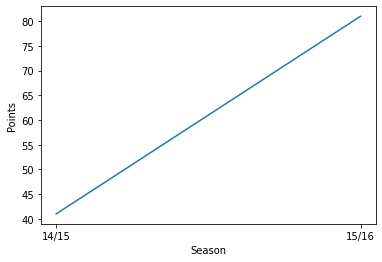

In [25]:

plt.plot(team_stats.loc[ best_progressed_teams.index[0], :])
plt.ylabel('Points'); plt.xlabel('Season');

#### Observation: 
This team progressed the most swiftly while playing only the last two seasons which kind of exceptional thing in football world since a team usually builds a plan in order to progress incrementally throughout the consecutive seasons.
Hence, in my opinion I shall not consider this observation to draw any conclusion since two season period can not be an indicative measure.

#### Let's take a look on other teams

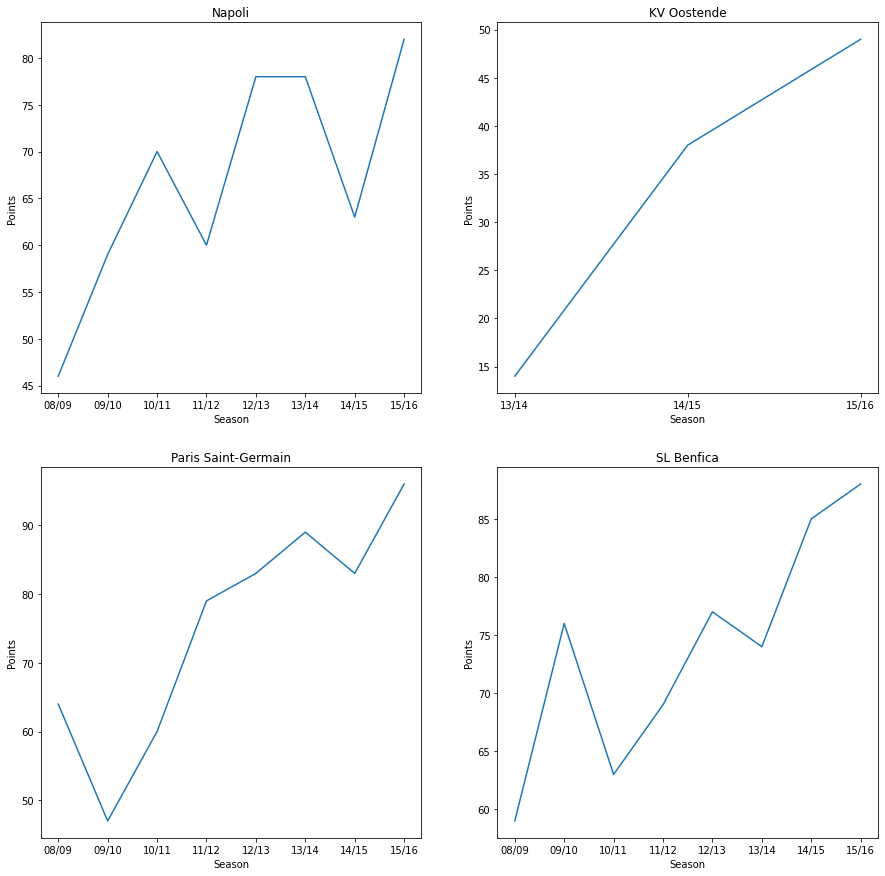

In [26]:
## Create subplots
fig, axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, j in [(0,0), (0,1), (1,0), (1,1)]:
    tmp_team_id = best_progressed_teams.index[i*2+j+1]
    axs[i, j].plot(team_stats.loc[ tmp_team_id, :])
    axs[i, j].set_title(team_name(tmp_team_id))
    axs[i, j].set(ylabel='Points', xlabel='Season')

#### Why these teams improved
Let's find out in this section a correlation among number of points and other criteria

remove '20' from season years so that i.e. `2008/2009` be `08/09` in Team_Attributes Table

In [27]:
dfs.Team_Attributes.season = dfs.Team_Attributes.season.apply(lambda x: x[2:5]+x[7:])
dfs.Team_Attributes = pd.merge(team_stats, dfs.Team_Attributes, how='inner',right_on=['team_api_id', 'season'],  left_on=['team_api_id', 'season']) 

In [28]:
dfs.Team_Attributes.corr()

,team_api_id,points,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Year
team_api_id,1.000000,-0.042410,-0.057503,0.128096,0.063970,0.062813,0.021022,0.010016,-0.020305,-0.057024,-0.077350,-0.029627,-0.087115,0.072771
points,-0.042410,1.000000,-0.116368,-0.235318,0.023081,0.039811,-0.154277,0.073101,0.111639,0.105834,0.190514,0.090814,0.088395,0.038005
id,-0.057503,-0.116368,1.000000,0.021490,-0.036153,0.052961,-0.018622,0.022925,-0.000661,-0.008535,-0.049309,-0.063056,-0.058431,-0.004879
team_fifa_api_id,0.128096,-0.235318,0.021490,1.000000,-0.013564,0.079822,0.038553,-0.023069,-0.121589,0.011487,-0.062049,0.012370,-0.079582,0.012989
buildUpPlaySpeed,0.063970,0.023081,-0.036153,-0.013564,1.000000,0.078500,0.414675,0.320864,0.194856,0.072082,0.026009,0.139566,0.069595,0.108809
buildUpPlayDribbling,0.062813,0.039811,0.052961,0.079822,0.078500,1.000000,-0.018964,0.148506,0.085396,0.165397,-0.018312,-0.087459,0.096769,-0.086362
buildUpPlayPassing,0.021022,-0.154277,-0.018622,0.038553,0.414675,-0.018964,1.000000,0.191673,0.226002,-0.080401,-0.086218,0.115808,0.036853,0.049520
chanceCreationPassing,0.010016,0.073101,0.022925,-0.023069,0.320864,0.148506,0.191673,1.000000,0.232422,0.155291,0.166795,0.133860,0.117509,0.016662
chanceCreationCrossing,-0.020305,0.111639,-0.000661,-0.121589,0.194856,0.085396,0.226002,0.232422,1.000000,-0.007175,0.026117,0.061450,0.090864,-0.010135
chanceCreationShooting,-0.057024,0.105834,-0.008535,0.011487,0.072082,0.165397,-0.080401,0.155291,-0.007175,1.000000,0.209289,0.119945,0.139513,-0.317567


Let's look at Napoli attribute `buildUpPlayPassing` with `points`

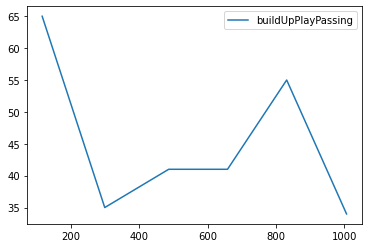

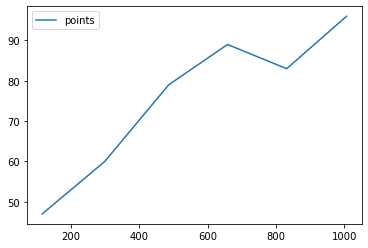

In [29]:
example_napoli = dfs.Team_Attributes.loc[dfs.Team_Attributes.team_api_id == 9847]
example_napoli.loc[:, ['season', 'buildUpPlayPassing']].plot()
example_napoli.loc[:, ['season', 'points']].plot()

As shown by `corr()` there is a relatively not inconsiderable value for inverse correlation between `points` and `buildupPlayByPassing`. I took Napoli as an example, we findout they have decided at the beginning in the first chart to ditch `buildupPlayByPassing` strategy. Since then the team has shown a rise in number of points throughout the seasons. Presumable this was decided by their new coach then "Sarri" who started a new age with this team bringing up new methods of play.

**Personal Insight** The Maximum value of correlation between one `criteria` and `points` is about `0.19` which is definitely not enough to rely on in making decisions. 
But we can see other criteria influencing a teams performance, it is also seen some correlations among the criteria themselves. This kind of problems requires machine learning in order to mix several criteria together from which we can even predict somehow the number of points that a team might end up having given those criteria.

### Research Question 2  (Players had most number of penalties!)

#### Dataset Issue
There is an issue here of multiple rows referring to the same player. The attribute `player_fifa_api_id` is unique for each player and we can find it repeated accross here.
Hence we use the `groupby` on the `player_fifa_api_id` and aggregate penalties by `max`.

Here shown the issue of repeated players accross rows

In [30]:
dfs.Player_Attributes.sort_values(by=['penalties'], ascending=False)[:4]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
149594,149595,13879,39225,2015-09-21 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149593,149594,13879,39225,2015-10-23 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149592,149593,13879,39225,2015-12-24 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0
149591,149592,13879,39225,2016-03-10 00:00:00,75.0,75.0,right,high,medium,67.0,...,77.0,96.0,30.0,26.0,19.0,13.0,15.0,7.0,16.0,11.0


Now use `groupby`

In [31]:
df_penalties = dfs.Player_Attributes.dropna().loc[:, ['player_fifa_api_id', 'penalties']]
df_penalties = df_penalties.groupby('player_fifa_api_id').max()

Time to sort the dataframe according to the number of penalties taken by player

In [32]:
df_penalties = df_penalties.sort_values(by=['penalties'], ascending=False)[:10]

Now we can list the players names according to most penalties taken

In [33]:
def player_name(id):
    return dfs.Player[dfs.Player.player_fifa_api_id == id].player_name.values[0]
df_penalties.index.map( player_name)

Index(['Rickie Lambert', 'Mario Balotelli', 'Paul Scholes', 'Xavi Hernandez',
       'Andrea Pirlo', 'Cesc Fabregas', 'Adrian Mutu', 'Iker Casillas',
       'David Trezeguet', 'Alexander Frei'],
      dtype='object', name='player_fifa_api_id')

<a id='conclusions'></a>
## Conclusions



**1.** Based on the personal insight in the last cell beneath **Research Question 1**, applying a machine learning algorithm (i.e. Random Forest, Multi-layer Perceptron, ...etc) might give us a good model to help teams tune their attributes well enough to end up with the maximum number of points in the season. That is since one attribute in this dataset is not enough to  boost end results.

**2.** Despite the presumable inverse correlation in the Napoli example, it does not have to be the cause of improvement since a counter argument needs to be developed studying other not as successful teams. As known that correlation does not imply causation, we need to see coaches of other teams who might have tried in their teams to ditch the `buildupPlayByPassing` and still ended up unsuccessful, unlike Napoli.